## Case Study 3: Building and Evaluating Predictive Models

## Decision Tree

In [2]:
def loadCsv():
    df = pd.read_csv('Project datasets/D2.csv')
    return df

In [3]:
def convertDataTypes(df):
    # change DemCluster from interval/integer to nominal/str
    df['contacts_count'] = df['contacts_count'].astype('int64')
    df['house_count'] = df['house_count'].astype('int64')
    df['alcohol'] = df['alcohol'].astype('int64')
    return df

In [4]:
#mapping categorical to numeric type
def mapCatVariables(df):
    # mapping
    insurance_map = {'yes':1, 'no': 0}
    df['insurance'] = df['insurance'].map(insurance_map)

    immigrant_map = {'native':0, 'immigrant': 1}
    df['immigrant'] = df['immigrant'].map(immigrant_map)
    return df


In [1]:
def data_prep():   
    df = loadCsv()
    df = convertDataTypes(df)
    df = mapCatVariables(df)
    df = pd.get_dummies(df)  # one-hot encoding 
    return df


In [5]:
#data preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = data_prep()
print(df)
# target/input split
y = df['covid19_positive']
X = df.drop(['covid19_positive'], axis=1)

X_mat = X.to_numpy()
X_mat

# setting random state
rs = 10

#splitting
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.33, stratify=y, random_state=rs)


      height  weight  insurance  immigrant  alcohol  contacts_count  \
0        174      64          1          0        3               7   
1        182     118          1          0        0               7   
2        184     118          1          0        0               7   
3        164      72          1          0       14               7   
4        192      92          1          0        0               7   
...      ...     ...        ...        ...      ...             ...   
6105     174      72          1          0        3               5   
6106     164     130          0          0        3              21   
6107     162      56          1          0        0              10   
6108     158      70          1          1        3              14   
6109     170      86          1          0        0              11   

      house_count  worried  covid19_positive  gender_female  ...  \
0               2        4                 1              0  ...   
1          

In [6]:
#Train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [7]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.6400594942984631


In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1178
           1       0.57      0.56      0.56       839

    accuracy                           0.64      2017
   macro avg       0.63      0.63      0.63      2017
weighted avg       0.64      0.64      0.64      2017



In [9]:
# Get the trained decision tree model
tree_model = model.tree_

# Calculate the number of nodes in the tree
num_nodes = tree_model.node_count
print("Number of Nodes:", num_nodes)

# Calculate the number of rules
num_rules = num_nodes - 1  # Subtract 1 for the root node
print("Number of Rules:", num_rules)


Number of Nodes: 1945
Number of Rules: 1944


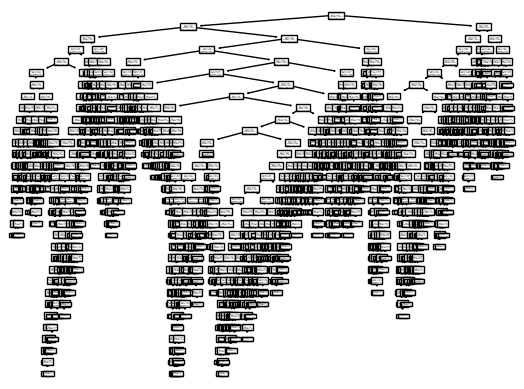

In [10]:
#drwa the tree model
# from sklearn import tree
# from matplotlib import pyplot as plt

# tree.plot_tree(model)
# plt.show()

In [11]:
# Get the feature index used for the first split
first_split_feature_index = tree_model.feature[0]
print("Variable used for the first split:", first_split_feature_index)

# Get the feature names from the dataset
feature_names = X.columns

# Get the variable name for the first split feature
first_split_feature_name = feature_names[first_split_feature_index]
print("Variable name used for the first split:", first_split_feature_name)


Variable used for the first split: 32
Variable name used for the first split: income_high


In [12]:
#parameters used
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [13]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

height : 0.11999165478446204
weight : 0.11918456286763947
income_high : 0.09387657572051732
contacts_count : 0.08489883860443678
house_count : 0.07007016346430925
worried : 0.0649367485144281
alcohol : 0.06411417060688461
working_never : 0.01689076790302088
age_60_70 : 0.016292187506004446
insurance : 0.015042832081370083
age_50_60 : 0.01425805503107856
blood_type_unknown : 0.01411858468254908
blood_type_ap : 0.01363350193982443
immigrant : 0.013599747815802043
smoking_quit10 : 0.013571806124845074
blood_type_op : 0.01343600607488511
age_30_40 : 0.012676574385682805
age_90_100 : 0.011675056768632801
race_white : 0.01131388938694622
working_travel critical : 0.010979909074880858


## GridSearchCV

In [14]:
#find for small max_depth value-before appyling GridSearchCV
#retrain with a small max_depth limit

# model_small = DecisionTreeClassifier(max_depth=3, random_state=rs)
# model_small.fit(X_train, y_train)

# print("Train accuracy:", model_small.score(X_train, y_train))
# print("Test accuracy:", model_small.score(X_test, y_test))

# y_pred = model_small.predict(X_test)
# print(classification_report(y_test, y_pred))

In [15]:
# importances = model_small.feature_importances_
# feature_names = X.columns

# # sort them out in descending order
# indices = np.argsort(importances)
# indices = np.flip(indices, axis=0)

# # limit to 20 features
# indices = indices[:20]

# for i in indices:
#     print(feature_names[i], ':', importances[i])

In [16]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)


{'mean_fit_time': array([0.00244725, 0.00178132, 0.00175512, 0.00174925, 0.00277145,
       0.00277486, 0.00291042, 0.00280476, 0.00378079, 0.00378044,
       0.00377038, 0.00378363, 0.00480597, 0.00467029, 0.00470583,
       0.00476298, 0.00580823, 0.00573711, 0.00563803, 0.00576687,
       0.00674164, 0.00653021, 0.00649042, 0.00653353, 0.0076818 ,
       0.00756314, 0.007493  , 0.00745888, 0.00861385, 0.00842702,
       0.00819767, 0.00804312, 0.00941839, 0.00910318, 0.00884511,
       0.00858383, 0.01018279, 0.00967557, 0.00921233, 0.00911777,
       0.01103482, 0.01045096, 0.00979149, 0.00938761, 0.01164274,
       0.01071568, 0.01031926, 0.00967479, 0.01227405, 0.01157811,
       0.02066197, 0.01009424, 0.02096527, 0.01169269, 0.01092422,
       0.01008041, 0.01265926, 0.0114073 , 0.01117873, 0.01024318,
       0.00179472, 0.00173779, 0.00172265, 0.00173094, 0.00278621,
       0.00279713, 0.00281746, 0.00278916, 0.00381756, 0.00384018,
       0.00397673, 0.0039706 , 0.00479569, 0

In [17]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


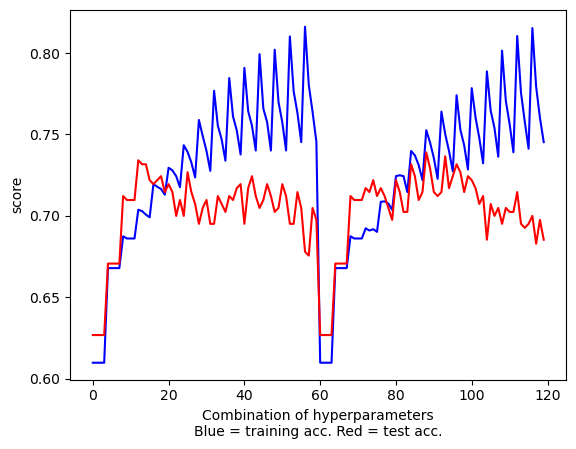

In [18]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

There are a total of 120 combinations of hyperparameters (2 x 15 x 5) meaning that there are 120 models. Let us now focus only on the max_depth to understand the bias and variance for the fixed criterion = 'entropy and min_sample_leaf = 10.

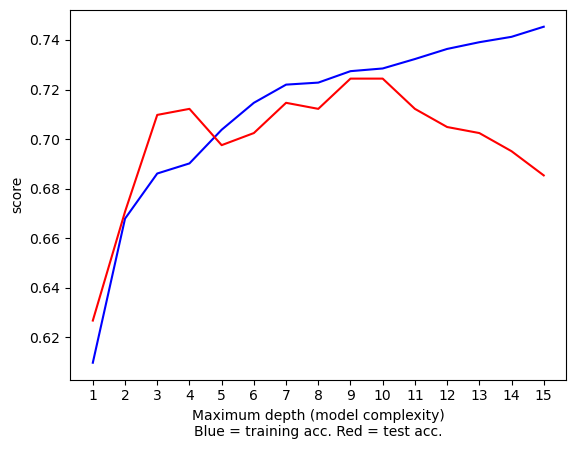

In [19]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==20)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

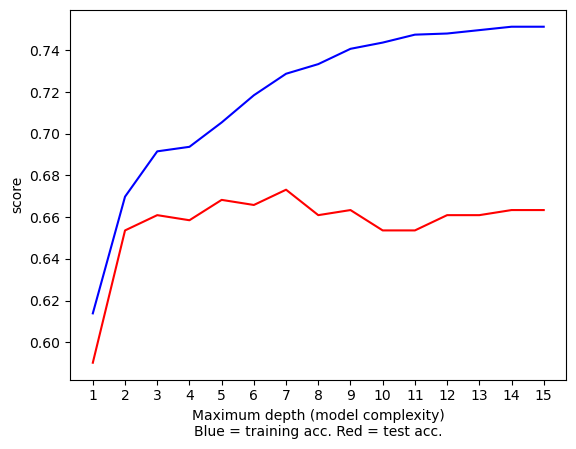

In [20]:
### Enter your code here for split1
### Solution
train_result = result_set['split1_train_score']
test_result = result_set['split1_test_score']
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

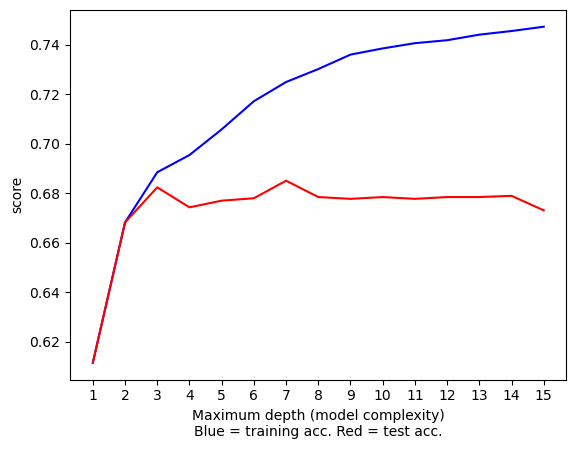

In [21]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [22]:
print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5}


In [23]:
#the best model with 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10 gives the same results as below
# model_small = DecisionTreeClassifier(max_depth=6, criterion= 'entropy',min_samples_leaf=10 ,random_state=rs)
# model_small.fit(X_train, y_train)

# print("Train accuracy:", model_small.score(X_train, y_train))
# print("Test accuracy:", model_small.score(X_test, y_test))

cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.7476178841925238
Test accuracy: 0.7149231531978185


In [24]:
y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1178
           1       0.67      0.61      0.64       839

    accuracy                           0.71      2017
   macro avg       0.71      0.70      0.70      2017
weighted avg       0.71      0.71      0.71      2017



In [25]:
# Get the best decision tree model from the grid search
best_model = cv_1.best_estimator_

In [26]:
# Get the tree structure of the best model
tree_model = best_model.tree_

# Calculate the number of nodes in the tree
num_nodes = tree_model.node_count
print("Number of Nodes:", num_nodes)

# Calculate the number of rules
num_rules = num_nodes - 1  # Subtract 1 for the root node
print("Number of Rules:", num_rules)


Number of Nodes: 195
Number of Rules: 194


In [27]:
# Build the tree model and visualaise
# from sklearn import tree
# from matplotlib import pyplot as plt

# fig, ax = plt.subplots(figsize=(100, 100)) 
# tree.plot_tree(best_model)
# plt.show()

In [28]:
# Get the feature importances from the best model
feature_importances = best_model.feature_importances_

# Get the index of the variable used for the first split
first_split_feature_index = feature_importances.argmax()

# Get the name of the variable used for the first split
first_split_feature_name = feature_names[first_split_feature_index]

print("Variable used for the first split:", first_split_feature_name)


Variable used for the first split: income_high


In [29]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = best_model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
#indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

income_high : 0.2919880809686643
worried : 0.14621927407092264
weight : 0.09037516779487055
contacts_count : 0.06426483641783837
house_count : 0.04522864534764656
alcohol : 0.03684459302881712
insurance : 0.03142403531754247
income_med : 0.030581729944119874
age_90_100 : 0.02941407401997426
height : 0.027822400742738257
race_white : 0.026072828751874493
age_60_70 : 0.017919163726196407
working_never : 0.01502052719449762
blood_type_ap : 0.013093188703062813
blood_type_on : 0.012899372105008529
smoking_never : 0.011139459280694524
blood_type_abp : 0.01111998861561672
working_travel critical : 0.010599721983695938
age_80_90 : 0.010584272177567043
blood_type_op : 0.010507481270713282
blood_type_unknown : 0.010455687032763478
race_other : 0.009212014206263296
gender_female : 0.009032548008484631
age_30_40 : 0.008653101541447512
age_50_60 : 0.008272906829178943
age_40_50 : 0.0061344223129417485
age_20_30 : 0.0046211309006991596
working_travel non critical : 0.0032706086345244243
race_mixed 

## compare models

## Using accuracy

In [30]:
#check best model by accuarcy
y_pred_dt = model.predict(X_test) # defualt paramteres
y_pred_dt_cv = cv_1.predict(X_test) #GridSearchCV

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.6400594942984631
Accuracy score on test for DT_optimal 0.7149231531978185


## Area Under the Curve

In [31]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on Target covid19_positive (0 = negative, 1 = positive). the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t')
    
    

Probability produced by decision tree for each class vs actual prediction on Target covid19_positive (0 = negative, 1 = positive). the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.3215339233038348 	 0.6784660766961652 	
0.3215339233038348 	 0.6784660766961652 	
0.2 	 0.8 	
0.9172932330827067 	 0.08270676691729323 	
0.9172932330827067 	 0.08270676691729323 	
0.6636636636636637 	 0.33633633633633636 	
0.7777777777777778 	 0.2222222222222222 	
0.3215339233038348 	 0.6784660766961652 	
0.8893805309734514 	 0.11061946902654868 	
0.3215339233038348 	 0.6784660766961652 	
0.3215339233038348 	 0.6784660766961652 	
0.8893805309734514 	 0.11061946902654868 	
0.125 	 0.875 	
0.3215339233038348 	 0.6784660766961652 	
0.9172932330827067 	 0.08270676691729323 	
0.5 	 0.5 	
0.8893805309734514 	 0.11061946902654868 	
0.673469387755102 	 0.32653061224489793 	
0.3215339233038348 	 0.6784660766961652 	
1.0 	 0.0 	


In [32]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.6285673380267155
ROC index on test for DT_optimal: 0.732281436992458


In [33]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

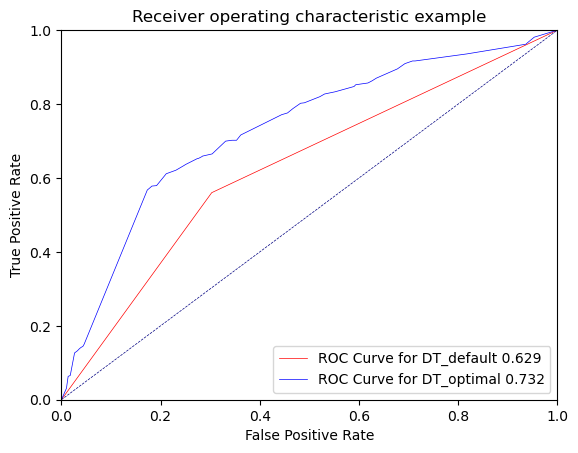

In [34]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [35]:
##save output

import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)